# 2023-08-28 7 - Results Multimodel Statinformed no-es.ipynb
Copy of notebook 6 but with the Autoformer runs without early stopping to fit the full 10 epochs.

## Fetching runs

In [83]:
import wandb
from math import isnan 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wandb
from tqdm import tqdm
# from cycler import cycler
import matplotlib as mpl
from IPython.display import Markdown, display
    
api = wandb.Api()
project = "Autoformer"
workspace = "alelab"

experiment_tags = ["e1_weather_10e_statinformed"]

# get all runs that both: 1.  match any experiment tag and 2. are finished
runs = api.runs(f"{workspace}/{project}",
                {"$and": [
                    {"tags": {"$in": experiment_tags}},
                    {"state": "finished"}
                ]})

all_runs = []
run_counter = 0
for run in tqdm(runs):
    run_counter += 1
    for split in ["train", "test"]:
        for metric in ["mse",]:
            pred_len = run.config["pred_len"]
            metrics = np.zeros(pred_len)
            for i in range(pred_len):
                run_dict = {**run.config}
                #run_dict["constraint_level"] = constraint_level
                run_dict[f"{metric}"] = run.summary[f"{metric}/{split}/{i}"]
                #run_dict[f"{metric}"] = run.summary.get(f"{metric}/{split}/{i}",run.summary.get(f"mse/{split}/{i}",np.nan)) #god forgive me for this line
                run_dict["step"]=i
                run_dict["epoch"]=run.summary["epoch"]
                run_dict["infeasible_rate"]=run.summary[f"infeasible_rate/{split}"]
                run_dict["split"] = split
                run_dict["run_id"] = run.id
                # Get either Constrained/ or ERM/ from the run name, then append model name.
                #print("run.name", run.name)
                #debug if ERM run
                run_dict["Algorithm"] = f"{run.name.split('/')[0]} {run.config['model']}"
                run_dict["sweep_id"] = run.sweep.id
                #print("Algorithm", run_dict["Algorithm"])

                # To better plot constrained vs ERM
                #TODO this is a hack while I consolidate the tags. 
                run_dict["type"] = "ERM" if run.config['dual_lr'] == 0 else "Constrained"

                all_runs.append(run_dict)
print(f"Fetched {run_counter} runs")
df = pd.DataFrame(all_runs)
print(f"Total records: {(df.shape)}")

100%|██████████| 32/32 [00:00<00:00, 155.60it/s]


Fetched 32 runs
Total records: (21504, 60)


There should be 3 runs per model, per pred length (3 x 2 x 4 = 24), plus ERM runs: 2 per model per pred_len (2 x 4 = 8) Total 32. 

In [84]:
df[['run_id',"sweep_id",'Algorithm','model','constraint_level','pred_len','epoch']].drop_duplicates().sort_values(["pred_len",'Algorithm','model',"constraint_level"])

,run_id,sweep_id,Algorithm,model,constraint_level,pred_len,epoch
2880,4rzb9gre,3k0wifa1,StatInformed-10e Autoformer,Autoformer,0.516,96,10
2688,khapjl47,3k0wifa1,StatInformed-10e Autoformer,Autoformer,0.553,96,10
2496,12wfdaw9,3k0wifa1,StatInformed-10e Autoformer,Autoformer,0.556,96,10
13824,dowv2wrc,fp5rn5h0,StatInformed-10e Reformer,Reformer,0.516,96,10
13632,b1adswkj,fp5rn5h0,StatInformed-10e Reformer,Reformer,0.553,96,10
13440,p9izzn2r,fp5rn5h0,StatInformed-10e Reformer,Reformer,0.556,96,10
13248,ne4liw91,fi1lnhc1,StatInformed-ERM-10e Autoformer,Autoformer,-1.000,96,4
10560,q9skmvft,fi1lnhc1,StatInformed-ERM-10e Reformer,Reformer,-1.000,96,7
3840,btyng7zq,z6ixuvgd,StatInformed-10e Autoformer,Autoformer,0.553,192,10
3456,bgf3s830,z6ixuvgd,StatInformed-10e Autoformer,Autoformer,0.567,192,10


## Plots

[ 0.556  0.553  0.516 -1.   ]


### pred_len: 96 constraint_level: 0.556

,pred_len,constraint_level,Algorithm,epoch,0
0,96,-1.000,StatInformed-ERM-10e Autoformer,4,96
1,96,-1.000,StatInformed-ERM-10e Reformer,7,96
2,96,0.556,StatInformed-10e Autoformer,10,96
3,96,0.556,StatInformed-10e Reformer,10,96


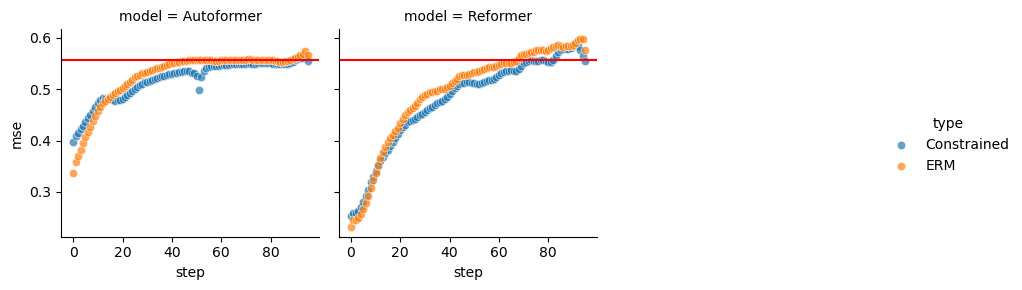

### pred_len: 96 constraint_level: 0.553

,pred_len,constraint_level,Algorithm,epoch,0
0,96,-1.000,StatInformed-ERM-10e Autoformer,4,96
1,96,-1.000,StatInformed-ERM-10e Reformer,7,96
2,96,0.553,StatInformed-10e Autoformer,10,96
3,96,0.553,StatInformed-10e Reformer,10,96


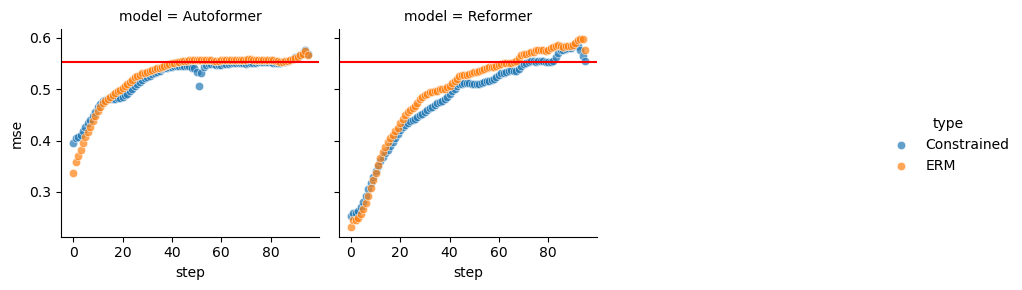

### pred_len: 96 constraint_level: 0.516

,pred_len,constraint_level,Algorithm,epoch,0
0,96,-1.000,StatInformed-ERM-10e Autoformer,4,96
1,96,-1.000,StatInformed-ERM-10e Reformer,7,96
2,96,0.516,StatInformed-10e Autoformer,10,96
3,96,0.516,StatInformed-10e Reformer,10,96


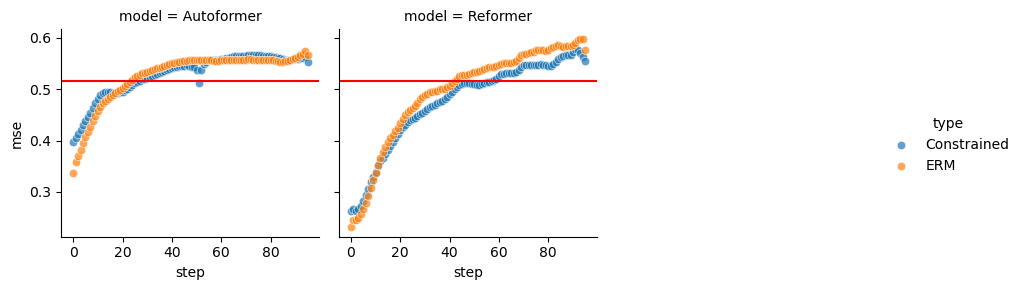

[-1.     0.665  0.567  0.553]


### pred_len: 192 constraint_level: 0.665

,pred_len,constraint_level,Algorithm,epoch,0
0,192,-1.000,StatInformed-ERM-10e Autoformer,10,192
1,192,-1.000,StatInformed-ERM-10e Reformer,10,192
2,192,0.665,StatInformed-10e Autoformer,10,192
3,192,0.665,StatInformed-10e Reformer,10,192


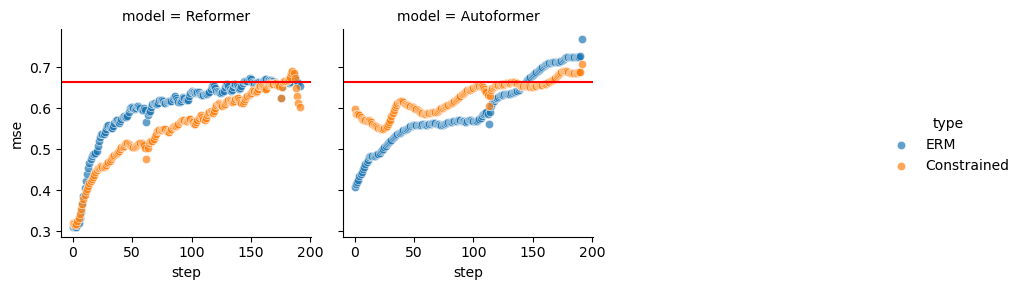

### pred_len: 192 constraint_level: 0.567

,pred_len,constraint_level,Algorithm,epoch,0
0,192,-1.000,StatInformed-ERM-10e Autoformer,10,192
1,192,-1.000,StatInformed-ERM-10e Reformer,10,192
2,192,0.567,StatInformed-10e Autoformer,10,192
3,192,0.567,StatInformed-10e Reformer,10,192


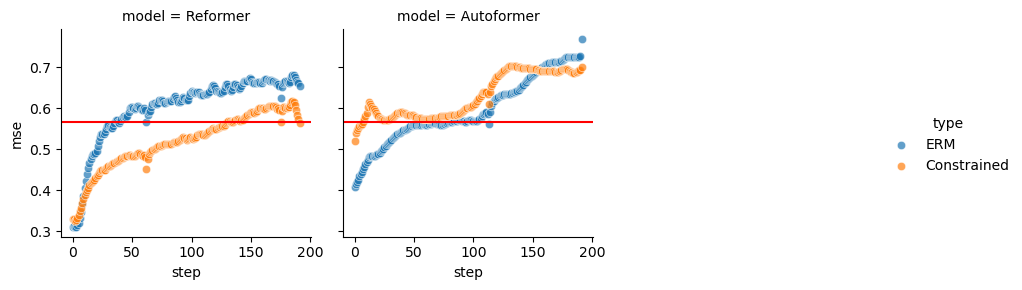

### pred_len: 192 constraint_level: 0.553

,pred_len,constraint_level,Algorithm,epoch,0
0,192,-1.000,StatInformed-ERM-10e Autoformer,10,192
1,192,-1.000,StatInformed-ERM-10e Reformer,10,192
2,192,0.553,StatInformed-10e Autoformer,10,192
3,192,0.553,StatInformed-10e Reformer,10,192


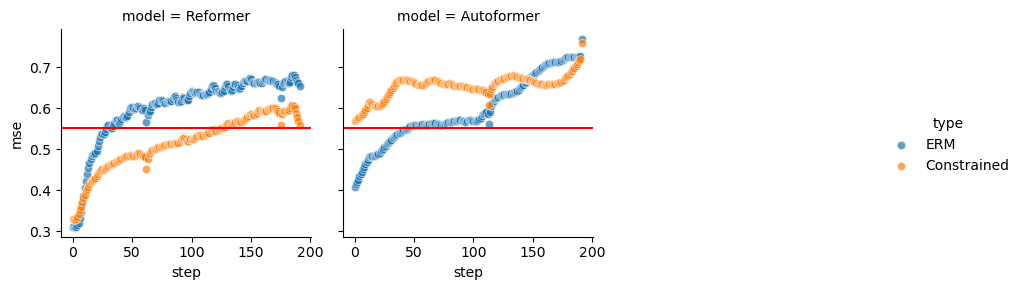

[-1.     0.97   0.741  0.682]


### pred_len: 336 constraint_level: 0.97

,pred_len,constraint_level,Algorithm,epoch,0
0,336,-1.00,StatInformed-ERM-10e Autoformer,5,336
1,336,-1.00,StatInformed-ERM-10e Reformer,10,336
2,336,0.97,StatInformed-10e Autoformer,10,336
3,336,0.97,StatInformed-10e Reformer,10,336


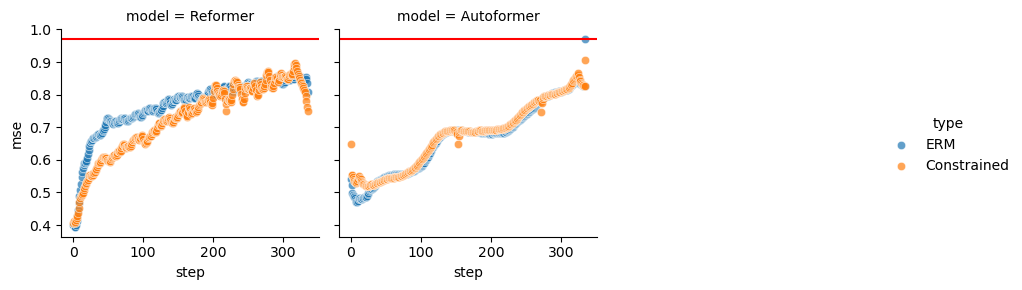

### pred_len: 336 constraint_level: 0.741

,pred_len,constraint_level,Algorithm,epoch,0
0,336,-1.000,StatInformed-ERM-10e Autoformer,5,336
1,336,-1.000,StatInformed-ERM-10e Reformer,10,336
2,336,0.741,StatInformed-10e Autoformer,10,336
3,336,0.741,StatInformed-10e Reformer,10,336


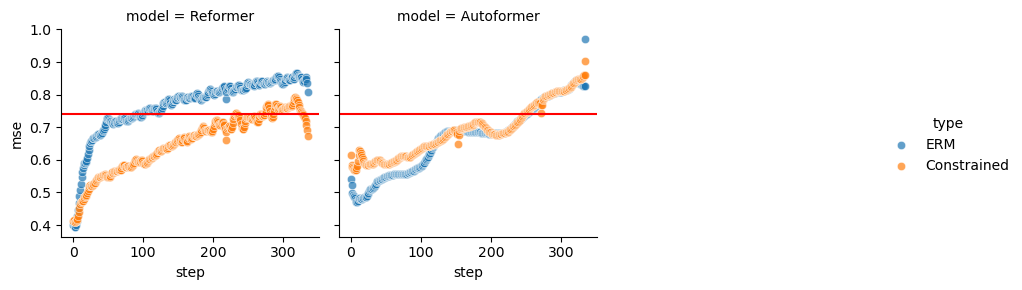

### pred_len: 336 constraint_level: 0.682

,pred_len,constraint_level,Algorithm,epoch,0
0,336,-1.000,StatInformed-ERM-10e Autoformer,5,336
1,336,-1.000,StatInformed-ERM-10e Reformer,10,336
2,336,0.682,StatInformed-10e Autoformer,10,336
3,336,0.682,StatInformed-10e Reformer,10,336


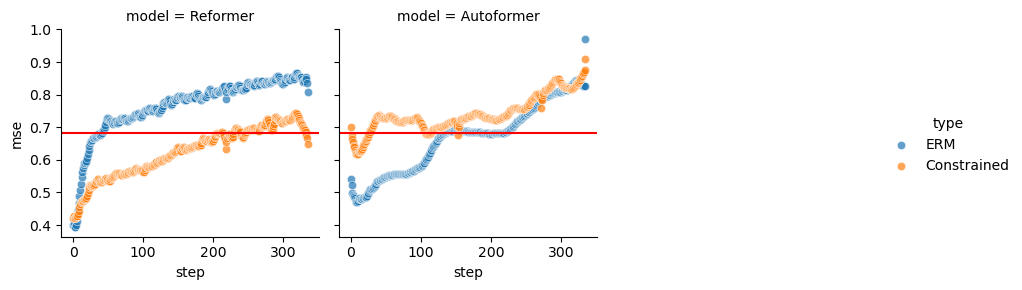

[-1.     0.912  0.862  0.698]


### pred_len: 720 constraint_level: 0.912

,pred_len,constraint_level,Algorithm,epoch,0
0,720,-1.000,StatInformed-ERM-10e Autoformer,10,720
1,720,-1.000,StatInformed-ERM-10e Reformer,10,720
2,720,0.912,StatInformed-10e Autoformer,10,720
3,720,0.912,StatInformed-10e Reformer,10,720


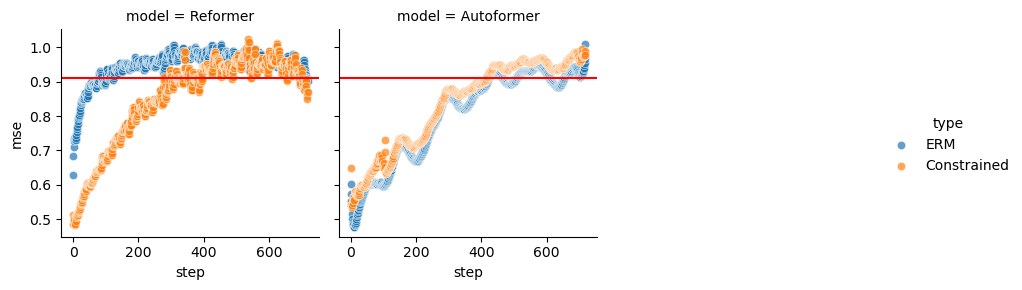

### pred_len: 720 constraint_level: 0.862

,pred_len,constraint_level,Algorithm,epoch,0
0,720,-1.000,StatInformed-ERM-10e Autoformer,10,720
1,720,-1.000,StatInformed-ERM-10e Reformer,10,720
2,720,0.862,StatInformed-10e Autoformer,10,720
3,720,0.862,StatInformed-10e Reformer,10,720


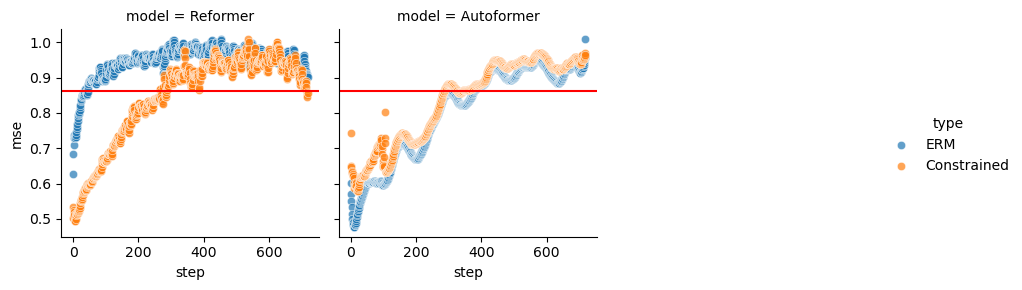

### pred_len: 720 constraint_level: 0.698

,pred_len,constraint_level,Algorithm,epoch,0
0,720,-1.000,StatInformed-ERM-10e Autoformer,10,720
1,720,-1.000,StatInformed-ERM-10e Reformer,10,720
2,720,0.698,StatInformed-10e Autoformer,10,720
3,720,0.698,StatInformed-10e Reformer,7,720


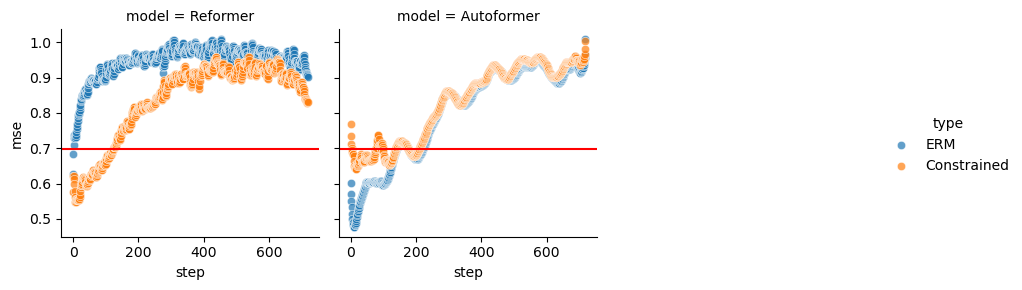

In [87]:
to_plot = df[df.split=='test']# just see test to unclutter
#to_plot=df
for (pred_len), series in to_plot.groupby(["pred_len"]):
    constraints = series.constraint_level.unique()
    print(constraints)
    constraints = constraints[constraints!=-1] # to iterate over all constraints explored.
    for constraint_level in constraints:
        display(Markdown(f"### pred_len: {pred_len} constraint_level: {constraint_level}"))
        plot_series = series[series["constraint_level"].isin([constraint_level,-1])] # The -1 adds the ERM baseline.

        display(plot_series.groupby(['pred_len','constraint_level','Algorithm','epoch']).size().reset_index())

        # sns.scatterplot(x="step", y="mse", hue="Algorithm",style="split", data=plot_series)
        
        # plt.axhline(y=constraint_level, color='r', linestyle='-')
        # plt.title(f"Pred Length: {pred_len}, Constraint_level: {constraint_level}")
        # plt.show()

        # This same scatterplot but in a grid by algorithm. 
        g = sns.FacetGrid(plot_series, col="model", hue="type",col_wrap=3)
        g.map(sns.scatterplot, "step", "mse", alpha=.7) 
        g.add_legend()
        # add the hline
        for ax in g.axes:
            ax.axhline(y=constraint_level, color='r', linestyle='-')
        plt.show()
